In [33]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
import os
import numpy as np
from sklearn import metrics
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow import keras
from tensorflow.keras import layers
from keras.applications.mobilenet_v2 import decode_predictions
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [34]:
#importing the data
data = pd.read_csv('Iris.csv', index_col=0)

#renaming the columns
data = data.rename(columns={"SepalLengthCm": "sepal_length", "SepalWidthCm": "sepal_width", "PetalLengthCm": "petal_length", "PetalWidthCm": "petal_width", "Species": "species"})

In [35]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [37]:
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [40]:
#make a copy of the species column
data['species_detailed'] = data['species']

#replacing the two not setosa species with "not Setosa"
dic_setosa = {'Iris-versicolor': 'not Setosa', 'Iris-virginica': 'not Setosa', 'Iris-setosa': 'Setosa'}
data = data.replace({"species": dic_setosa})
data['species'].value_counts()

not Setosa    100
Setosa         50
Name: species, dtype: int64

In [41]:
features = data.drop(columns=['species', 'species_detailed'])
labels = data['species']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=155)

clf_setosa = LogisticRegression(random_state=155)
clf_setosa.fit(X_train, y_train)

LogisticRegression(random_state=155)

In [42]:
y_test_pred = clf_setosa.predict(X_test)

accuracy = metrics.accuracy_score(y_test,y_test_pred)
print('Accuracy {}'.format(accuracy))

Accuracy 1.0


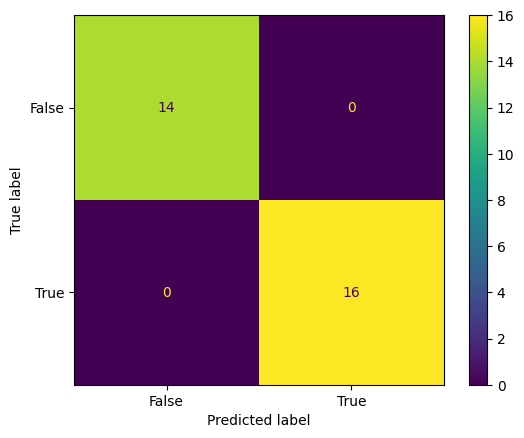

In [43]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test,y_test_pred)

cm_display = metrics.ConfusionMatrixDisplay(
    confusion_matrix = confusion_matrix, display_labels = [False, True])


cm_display.plot()
plt.show()  


In [46]:

Specificity = metrics.recall_score(y_test,y_test_pred, average="binary", pos_label="neg")
print('Specificity {}'.format(Specificity))

ValueError: pos_label=neg is not a valid label. It should be one of ['Setosa', 'not Setosa']